In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yielddata/yield_df.csv


# Load the Dataset

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/kaggle/input/yielddata/yield_df.csv')

# Preview the first few rows
df.head()


,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [3]:
# Drop the unnamed column
df.drop(columns=["Unnamed: 0"], inplace=True)

# Check result
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


# Inspect the Data Structure

In [4]:
# Check dimensions and column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [5]:
# Get summary statistics
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [6]:
# Check for missing values
print('Missing Values Count:')
print()
print(df.isnull().sum())

Missing Values Count:

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64


## Check for Duplicates or Inconsistencies

In [7]:
# Check for duplicates
print("Duplicates:", df.duplicated().sum())

# Check unique values in categorical columns
print("Unique Areas:", df['Area'].nunique())
print("Unique Crops:", df['Item'].nunique())

Duplicates: 2310
Unique Areas: 101
Unique Crops: 10


## Remove Duplicates

In [8]:
# Drop duplicate rows
df = df.drop_duplicates()

# Confirm removal
print("After removal:", df.duplicated().sum())

After removal: 0


## Dataset Size After Removing Duplicates

In [9]:
df.shape

(25932, 7)

# Exploratory Data Analysis

## Distribution of Target Variable

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


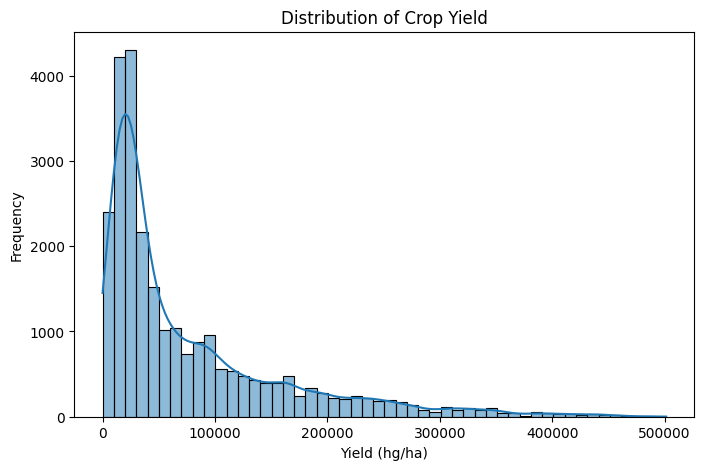

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['hg/ha_yield'], bins=50, kde=True)
plt.title('Distribution of Crop Yield')
plt.xlabel('Yield (hg/ha)')
plt.ylabel('Frequency')
plt.show()

## Distribution of Numerical Features

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


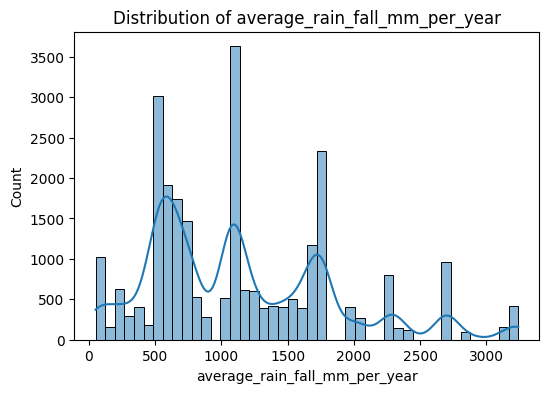

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


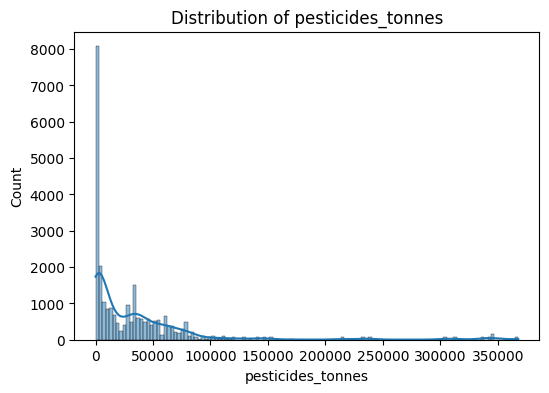

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


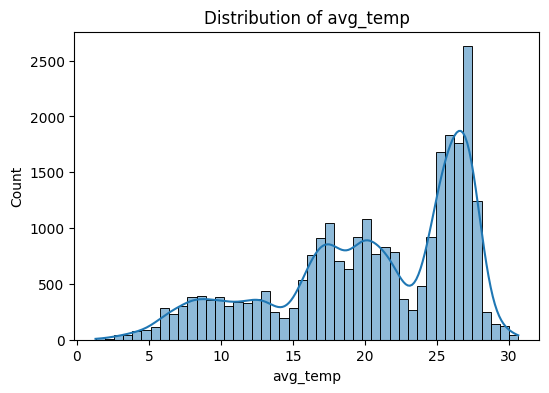

In [11]:
num_cols = ['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


## Correlation Heatmap

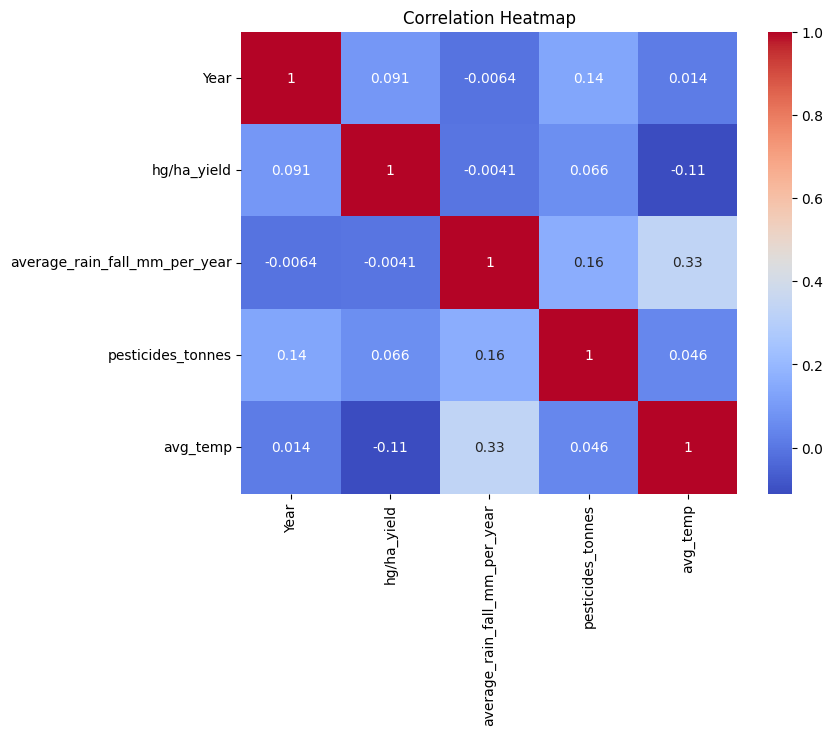

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Categorical Analysis

### Yield per Crop

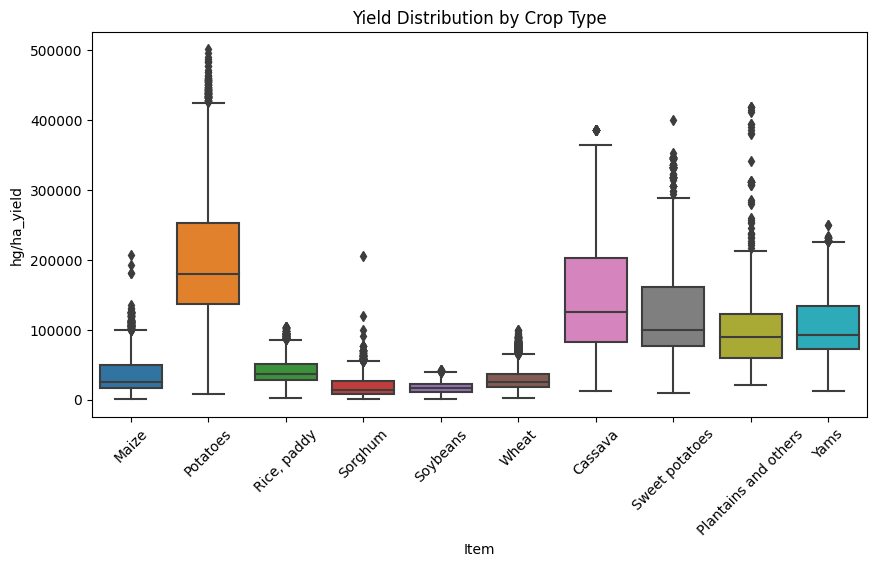

In [13]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Item', y='hg/ha_yield')
plt.xticks(rotation=45)
plt.title('Yield Distribution by Crop Type')
plt.show()


### Yield per Country (Top 10)

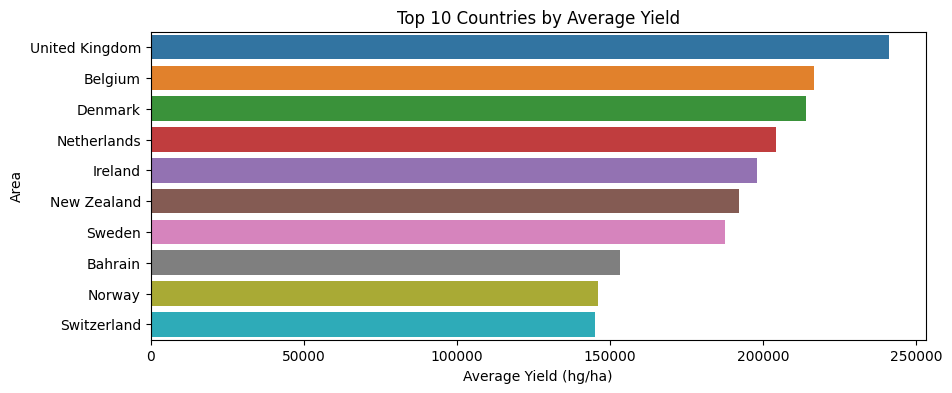

In [14]:
top_areas = df.groupby('Area')['hg/ha_yield'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 4))
sns.barplot(x=top_areas.values, y=top_areas.index)
plt.title('Top 10 Countries by Average Yield')
plt.xlabel('Average Yield (hg/ha)')
plt.show()

### Temporal Trends

/tmp/ipykernel_36/2947879519.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Year', y='hg/ha_yield', ci=None)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


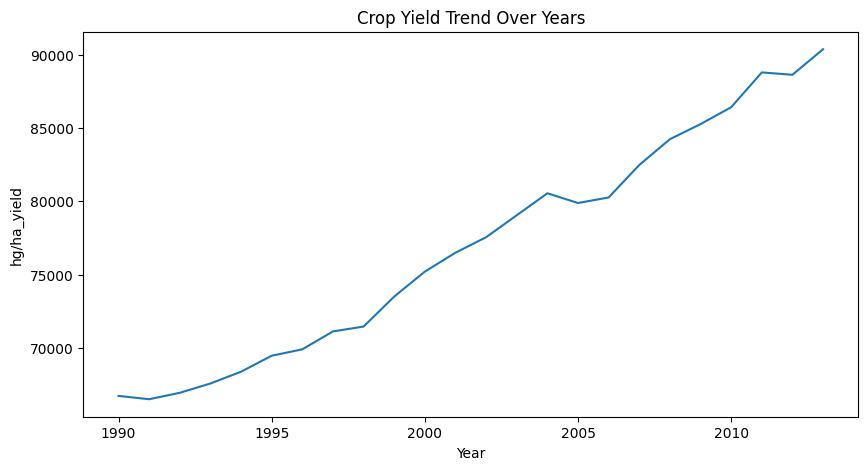

In [15]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Year', y='hg/ha_yield', ci=None)
plt.title('Crop Yield Trend Over Years')
plt.show()

### Bivariate Plots

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

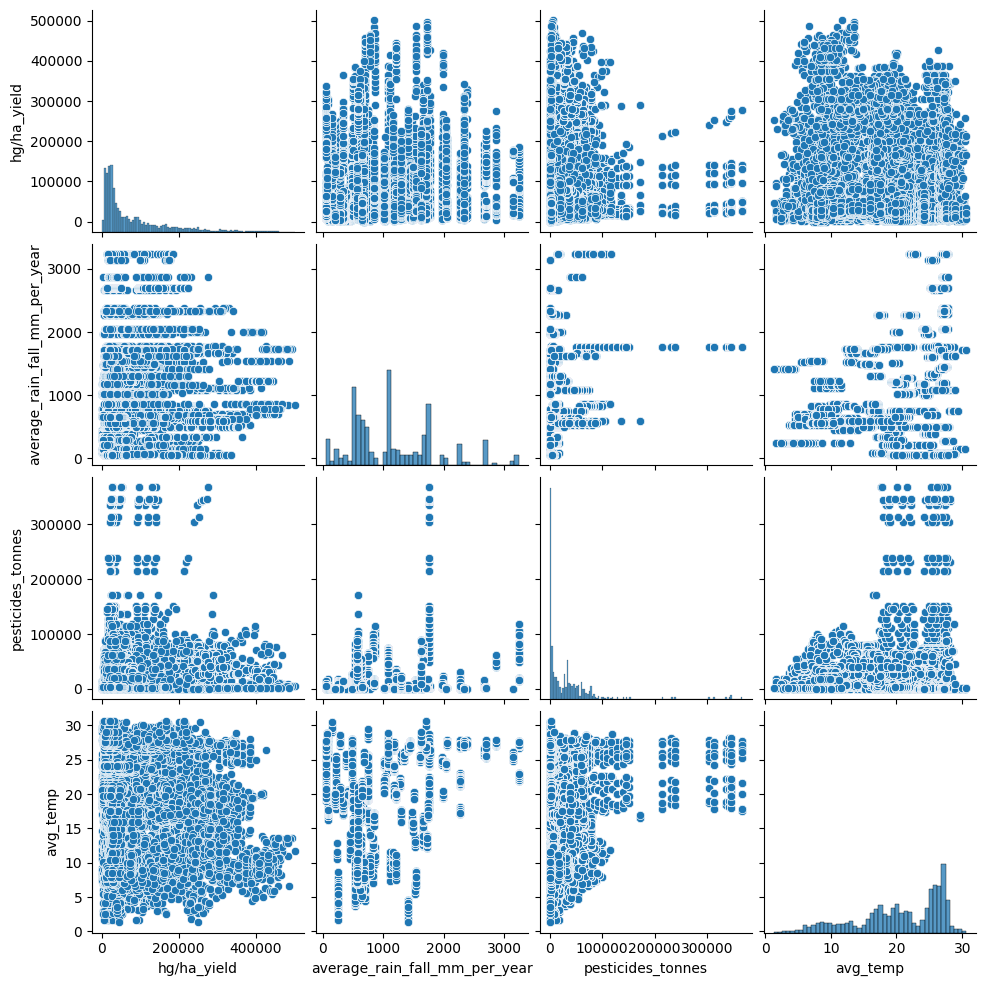

In [16]:
sns.pairplot(df, vars=['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'])
plt.show()


# Preprocessing

## Encode Categorical Variables

In [17]:
from sklearn.preprocessing import LabelEncoder

le_area = LabelEncoder()
le_item = LabelEncoder()

df['Area_enc'] = le_area.fit_transform(df['Area'])
df['Item_enc'] = le_item.fit_transform(df['Item'])

## Select Features and Target

In [18]:
features = ['Area_enc', 'Item_enc', 'Year', 'average_rain_fall_mm_per_year',
            'pesticides_tonnes', 'avg_temp']
target = 'hg/ha_yield'

X = df[features]
y = df[target]

## Train-Test Split

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scale Features

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeling

## Setup (Preprocessed X_train, X_test, y_train, y_test)

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return {'MAE': mae, 'RMSE': rmse, 'R²': r2}

## Basic Model — Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_results = evaluate_model(lr_model, X_test, y_test)
print("Linear Regression:", lr_results)

Linear Regression: {'MAE': 62177.71026855598, 'RMSE': 81661.31869969239, 'R²': 0.07992946727282535}


## Decision Tree Regressor

In [23]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

dt_results = evaluate_model(dt_model, X_test, y_test)
print("Decision Tree:", dt_results)

Decision Tree: {'MAE': 4496.280508964719, 'RMSE': 14233.983833702323, 'R²': 0.9720461725188957}


## Random Forest Regressor

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_results = evaluate_model(rf_model, X_test, y_test)
print("Random Forest:", rf_results)

Random Forest: {'MAE': 4221.7190996722575, 'RMSE': 10999.900083399647, 'R²': 0.9833057918295581}


## XGBoost Regressor (Advanced)

In [25]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

xgb_results = evaluate_model(xgb_model, X_test, y_test)
print("XGBoost:", xgb_results)

XGBoost: {'MAE': 10637.224696538662, 'RMSE': 18540.427189676608, 'R²': 0.9525727638006982}


## Deep Learning Model: Feedforward Neural Network (Regression)

### Step 1: Import Libraries

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

2025-07-12 16:23:08.812019: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752337389.060861      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752337389.131737      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [28]:
pip install keras-tuner --upgrade

Note: you may need to restart the kernel to use updated packages.


### Step 2: Define a Model-Building Function

In [29]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_model(hp):
    model = Sequential()
    
    # Input layer
    model.add(Dense(units=hp.Int('units_input', min_value=32, max_value=256, step=32),
                    activation='relu',
                    input_dim=X_train_scaled.shape[1]))
    
    # Hidden layers
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
                        activation='relu'))
        model.add(Dropout(rate=hp.Float(f'dropout_{i}', 0.1, 0.5, step=0.1)))
    
    # Output layer
    model.add(Dense(1))

    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mse',
        metrics=['mae', tf.keras.metrics.RootMeanSquaredError()]
    )

    return model


### Step 3: Initialize the Tuner

In [30]:
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_loss',
    max_trials=20,
    directory='crop_yield_tuning',
    project_name='deep_learning'
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1752337407.535282      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


### Step 4: Perform Hyperparameter Search

In [31]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

tuner.search(X_train_scaled, y_train,
             epochs=100,
             validation_split=0.2,
             callbacks=[early_stop],
             verbose=2)


Trial 20 Complete [00h 02m 25s]
val_loss: 1438185216.0

Best val_loss So Far: 236150928.0
Total elapsed time: 00h 44m 54s


### Step 5: Get Best Hyperparameters & Train Final Model

In [32]:
best_hp = tuner.get_best_hyperparameters(1)[0]

model = tuner.hypermodel.build(best_hp)
history = model.fit(X_train_scaled, y_train,
                    validation_split=0.2,
                    epochs=100,
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/100
519/519 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 7775313920.0000 - mae: 62856.0938 - root_mean_squared_error: 87846.1172 - val_loss: 6347832320.0000 - val_mae: 59102.7969 - val_root_mean_squared_error: 79673.2812
Epoch 2/100
519/519 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6646336000.0000 - mae: 60698.0352 - root_mean_squared_error: 81488.8516 - val_loss: 6304715264.0000 - val_mae: 58542.8711 - val_root_mean_squared_error: 79402.2344
Epoch 3/100
519/519 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6372530688.0000 - mae: 59149.7070 - root_mean_squared_error: 79807.7109 - val_loss: 6224636416.0000 - val_mae: 59093.2930 - val_root_mean_squared_error: 78896.3594
Epoch 4/100
519/519 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6356324864.0000 - mae: 59840.3242 - root_mean_squared_error: 79710.3828 - val_loss: 6171726848.0000 - val_mae: 54264.5938 - val_root_mean_squared_error: 78560.3359
Epoch 5/100
519/519 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5753071104.0000 - mae: 56972.4297 - roo

### Step 6: Evaluate the Tuned Model

In [33]:
y_pred_dl_opt = model.predict(X_test_scaled).flatten()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_dl_opt = mean_absolute_error(y_test, y_pred_dl_opt)
rmse_dl_opt = np.sqrt(mean_squared_error(y_test, y_pred_dl_opt))
r2_dl_opt = r2_score(y_test, y_pred_dl_opt)

print(f"Optimized DL → MAE: {mae_dl_opt:.2f}, RMSE: {rmse_dl_opt:.2f}, R²: {r2_dl_opt:.3f}")

163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Optimized DL → MAE: 9494.12, RMSE: 16804.07, R²: 0.961


In [34]:
dl_opt_results = {
    "MAE": mae_dl_opt,
    "RMSE": rmse_dl_opt,
    "R²": r2_dl_opt
}

### Step 7: Plot Training History

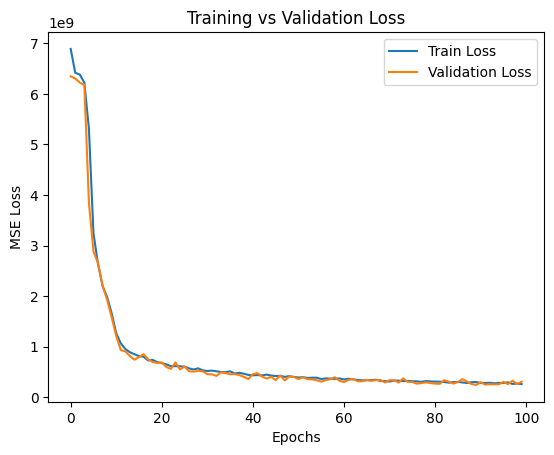

In [35]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()


# Compare Results

In [36]:
results = {
    "Linear Regression": lr_results,
    "Decision Tree": dt_results,
    "Random Forest": rf_results,
    "XGBoost": xgb_results,
    "Deep Learning": dl_opt_results
}

for name, scores in results.items():
    print(f"{name} → MAE: {scores['MAE']:.2f}, RMSE: {scores['RMSE']:.2f}, R²: {scores['R²']:.3f}")

Linear Regression → MAE: 62177.71, RMSE: 81661.32, R²: 0.080
Decision Tree → MAE: 4496.28, RMSE: 14233.98, R²: 0.972
Random Forest → MAE: 4221.72, RMSE: 10999.90, R²: 0.983
XGBoost → MAE: 10637.22, RMSE: 18540.43, R²: 0.953
Deep Learning → MAE: 9494.12, RMSE: 16804.07, R²: 0.961


## Graphical Comparison of Models

In [37]:
results = {
    "Linear Regression": lr_results,
    "Decision Tree": dt_results,
    "Random Forest": rf_results,
    "XGBoost": xgb_results,
    "Deep Learning": dl_opt_results
}

In [38]:
import matplotlib.pyplot as plt

# Extract model names and metrics
models = list(results.keys())
mae = [results[m]['MAE'] for m in models]
rmse = [results[m]['RMSE'] for m in models]
r2 = [results[m]['R²'] for m in models]

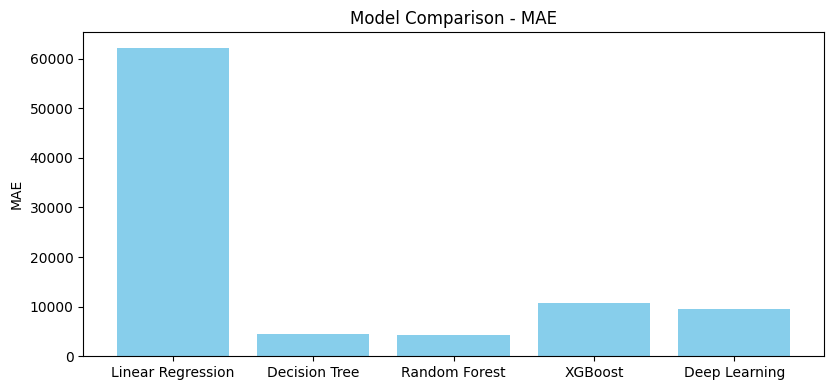

In [39]:
# Plotting
plt.figure(figsize=(16, 4))

# MAE
plt.subplot(1, 2, 1)
plt.bar(models, mae, color='skyblue')
plt.title('Model Comparison - MAE')
plt.ylabel('MAE')

plt.tight_layout()
plt.show()

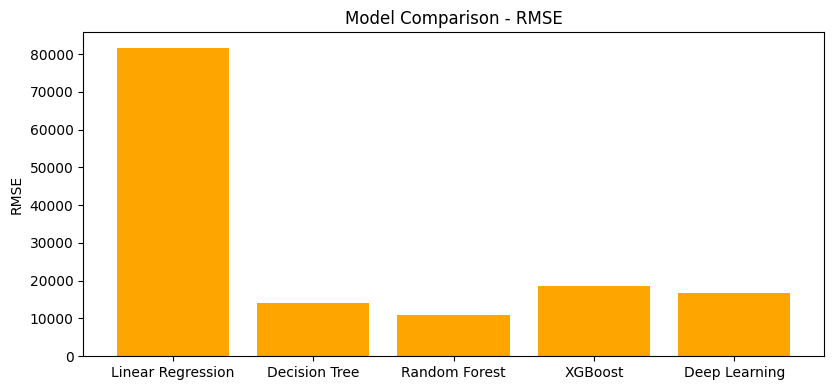

In [40]:
# Plotting
plt.figure(figsize=(16, 4))

# RMSE
plt.subplot(1, 2, 2)
plt.bar(models, rmse, color='orange')
plt.title('Model Comparison - RMSE')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()

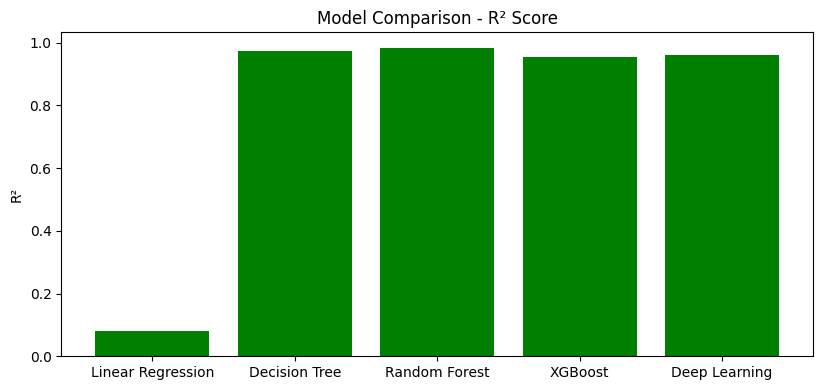

In [41]:
# Plotting
plt.figure(figsize=(16, 4))

# R² Score
plt.subplot(1, 2, 2)
plt.bar(models, r2, color='green')
plt.title('Model Comparison - R² Score')
plt.ylabel('R²')

plt.tight_layout()
plt.show()

# SHAP Analysis

In [42]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


## Basic SHAP Analysis for Random Forest

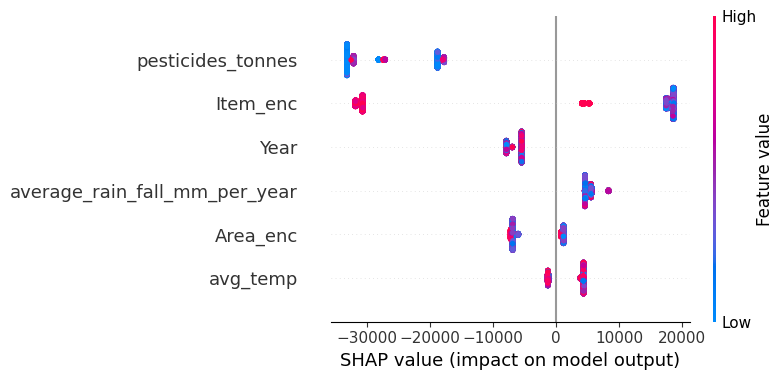

In [43]:
import shap

# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test_scaled)

# Summary plot (global feature importance)
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)


## Force Plot (local explanation for a single instance)

In [45]:
X_test_df = pd.DataFrame(X_test_scaled, columns=X.columns)

In [46]:
# Visualize explanation for the first test instance
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test_df.iloc[0])

## Feature Importance Bar Plot

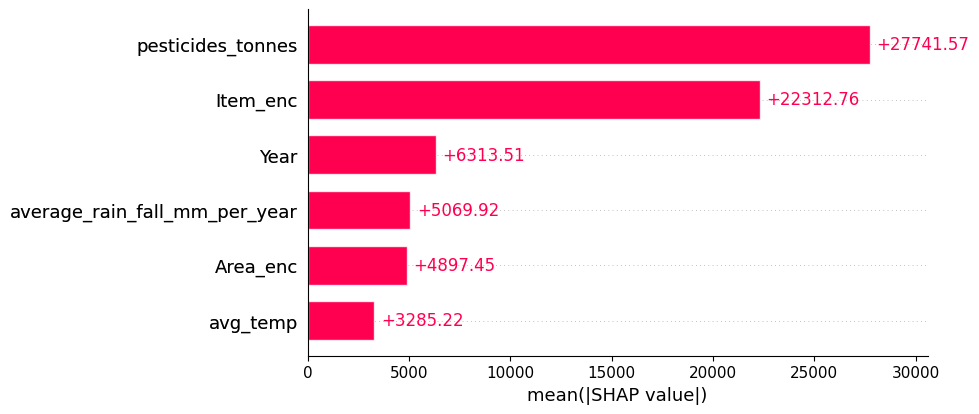

In [47]:
shap.plots.bar(shap.Explanation(values=shap_values, 
                                base_values=explainer.expected_value,
                                data=X_test_scaled,
                                feature_names=X.columns))


## SHAP for Deep Learning

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


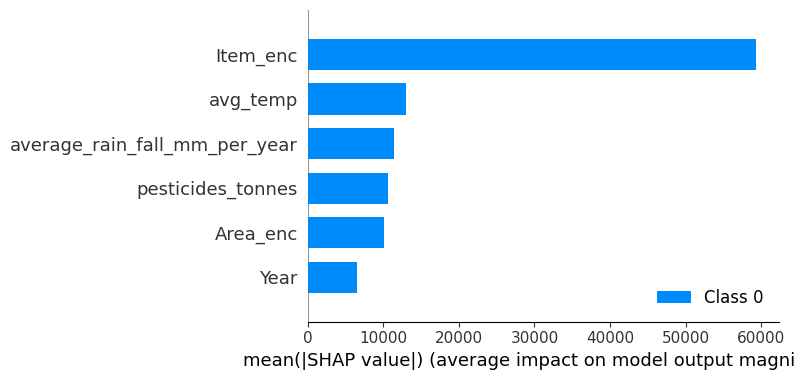

In [51]:
explainer_kernel = shap.KernelExplainer(model.predict, background)
shap_values_kernel = explainer_kernel.shap_values(test_sample)

shap.summary_plot(shap_values_kernel, X_test_df)
